# Random Forest

Random Forest es un modelo de aprendizaje automático supervisado utilizado para tareas de clasificación y regresión. Su mecanismo se basa en la construcción de múltiples árboles de decisión, donde cada árbol se entrena en una muestra aleatoria de los datos y utiliza un subconjunto aleatorio de las características para hacer predicciones.

El proceso de construcción de un modelo de Random Forest se lleva a cabo en los siguientes pasos:

1. Seleccionar un conjunto aleatorio de datos de entrenamiento del conjunto de datos original con reemplazo (lo que se conoce como el método de "bootstraping").

2. Para cada conjunto de datos de entrenamiento, se construye un árbol de decisión utilizando un subconjunto aleatorio de características.

3. Se repiten los pasos 1 y 2 varias veces para construir múltiples árboles de decisión.

4. Para hacer una predicción, se pasa el nuevo dato a través de cada árbol y se obtiene una predicción para cada árbol.

5. Se calcula la predicción final utilizando alguna regla de combinación de votos, como tomar la media o la moda de las predicciones de todos los árboles.

El objetivo de este proceso es reducir la varianza del modelo y evitar el sobreajuste, ya que la combinación de múltiples árboles reduce la sensibilidad a la aleatoriedad en los datos y las características seleccionadas.

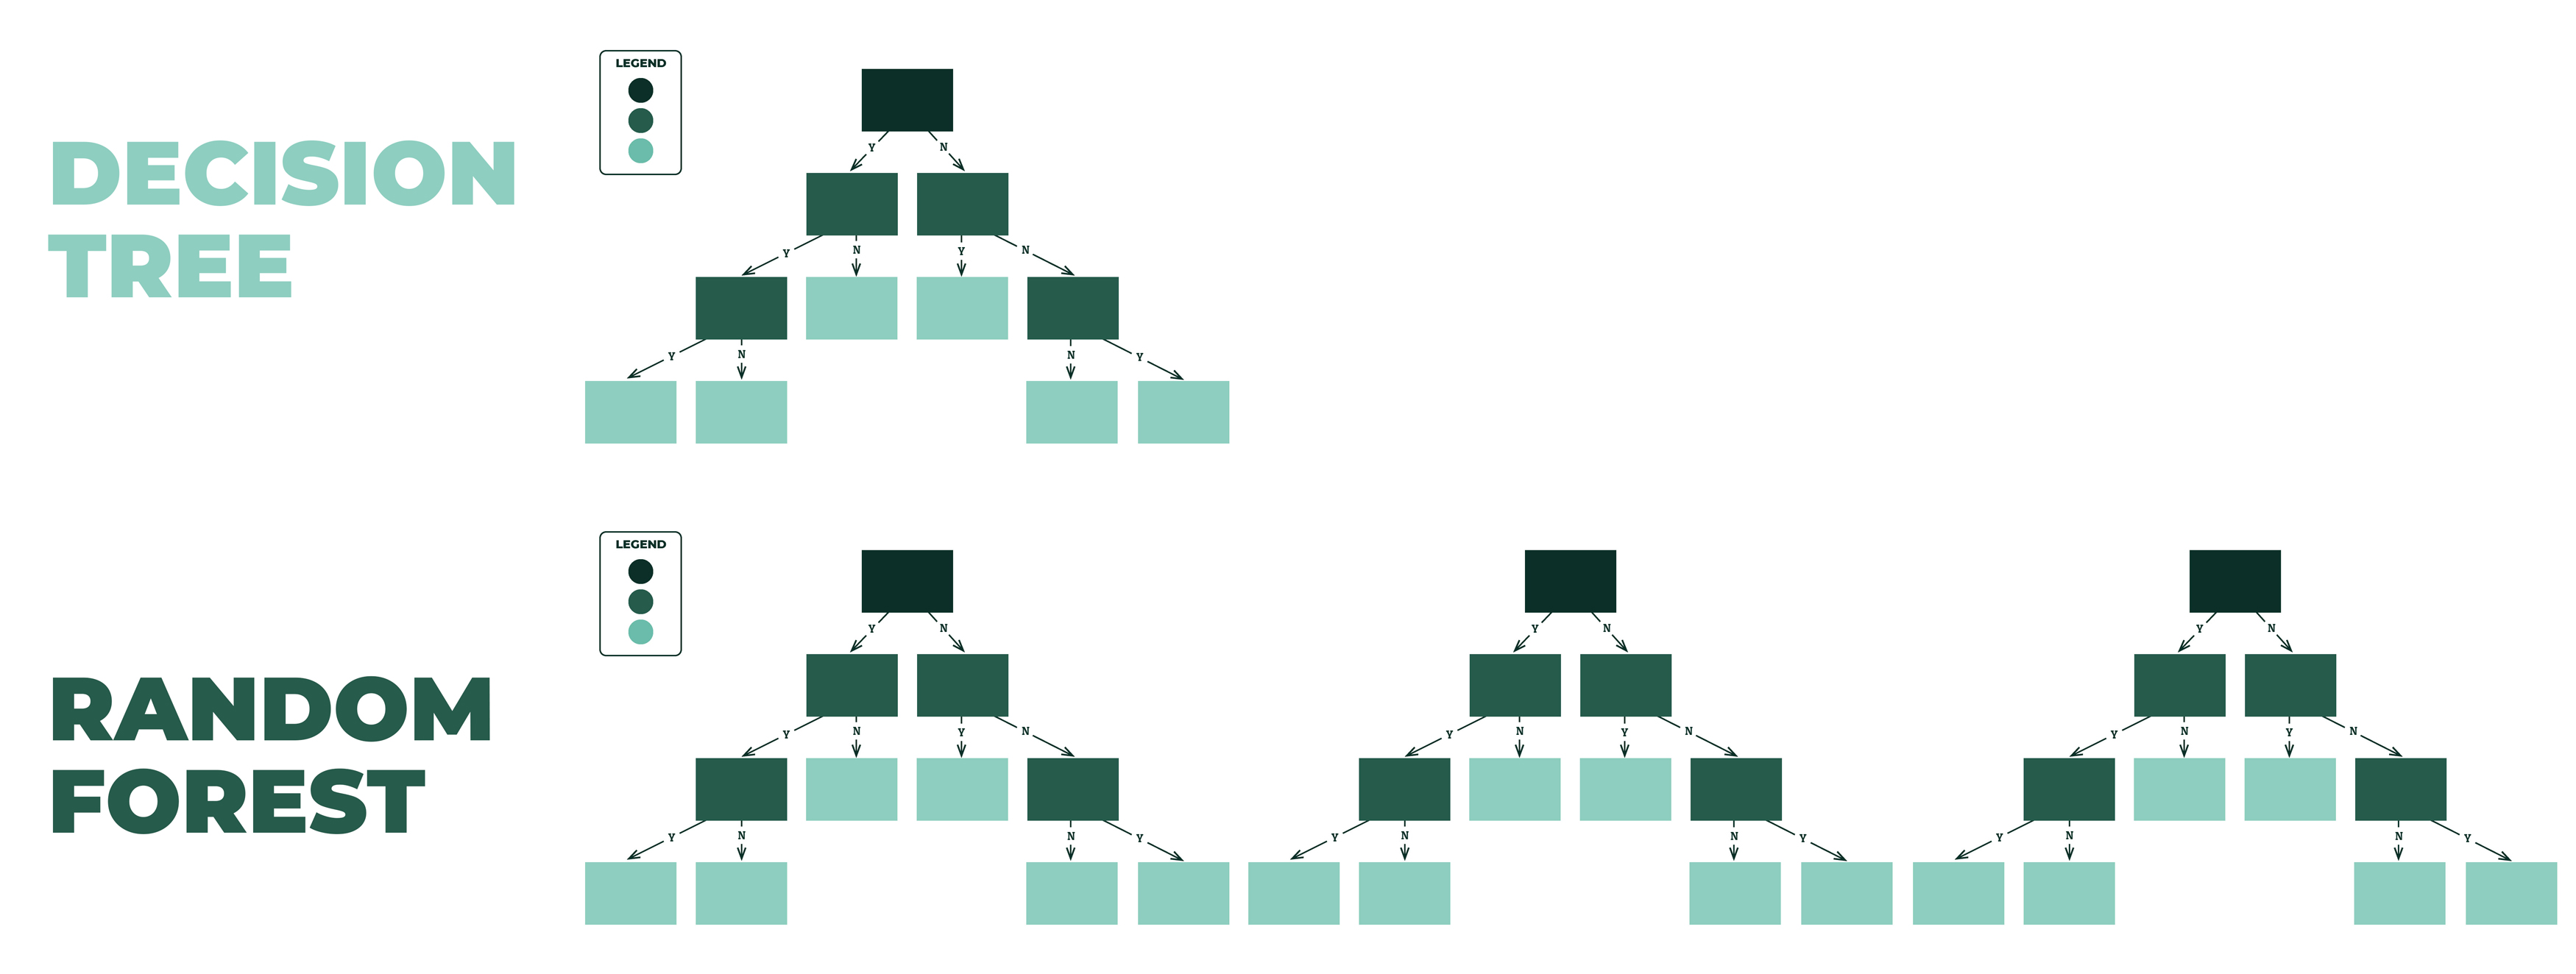

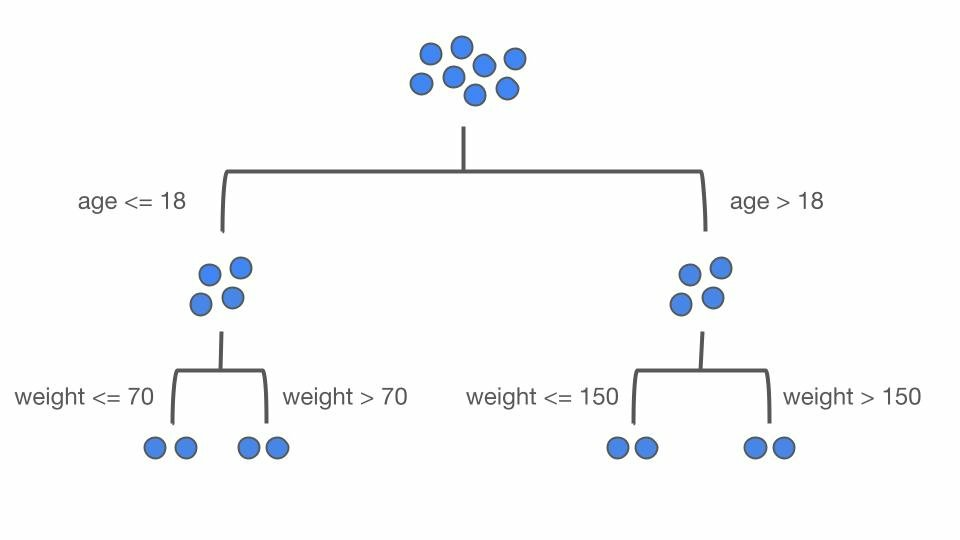

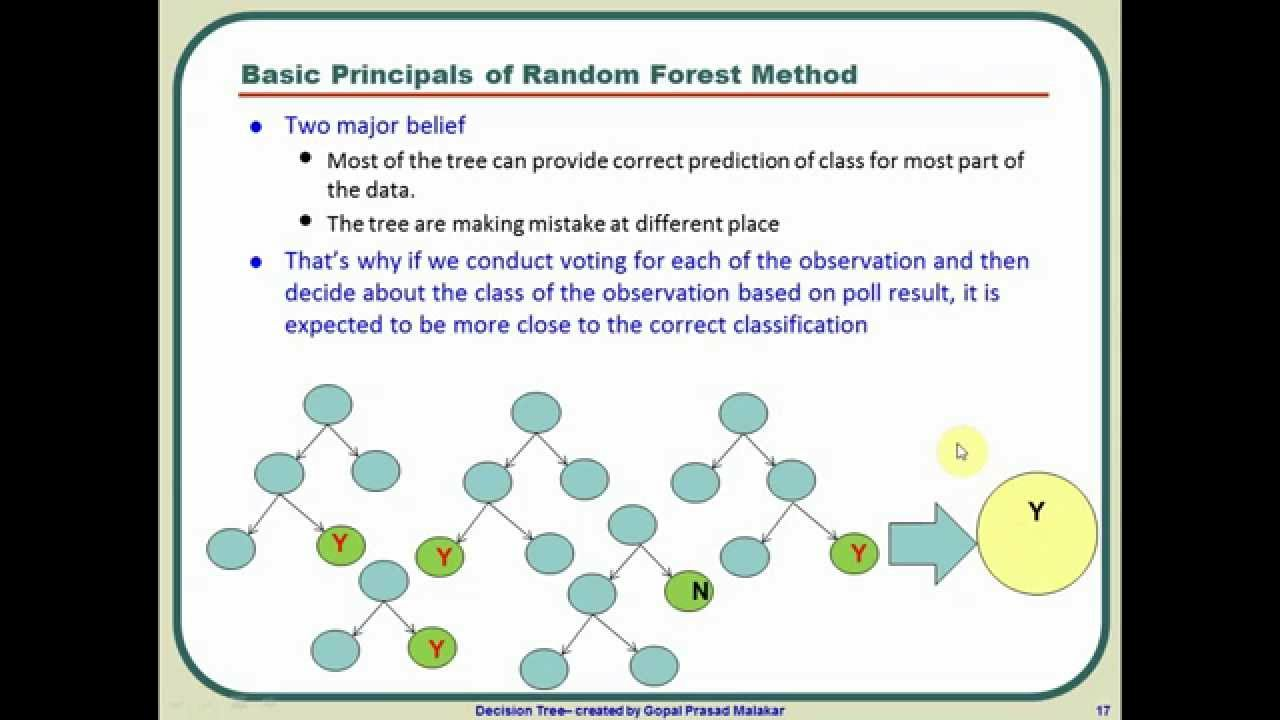

https://en.wikipedia.org/wiki/Iris_flower_data_set

https://rstudio-pubs-static.s3.amazonaws.com/658019_2e987aabfe0a4c5093284b25bf73968c.html

http://mirlab.org/jang/books/dcpr/dataSetIris.asp?title=2-2%20Iris%20Dataset

In [208]:
import pandas as pd

In [209]:
# Cargar datos. Vamos a utilizar el conjunto de datos de flores Iris:
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
# El parámetro header=None se utiliza para indicar que el conjunto de datos no tiene una fila de encabezado en el archivo CSV

# Pandas asigna nombres de columna predeterminados (0, 1, 2, etc.) a cada columna. Renombramos:
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


We will refer to the rows of the matrix as samples, and the number of rows as n_samples and the the columns of the matrix as features, and the number of columns as n_features.

# Features matrix (X)

This table layout makes clear that the information can be thought of as a two-dimensional numerical array or matrix, called the features matrix with shape [n_samples, n_features]

# Target array (y)

In addition to the feature matrix X, we also generally work with a label or target array, which by convention we will usually call y. The target array is usually one dimensional, with length n_samples, and is generally contained in a NumPy array or Pandas Series.

In [210]:
# Target names

iris["class"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

***

# Machine Learning Terminology

- Each row is an observation (also known as : sample, example, instance, record)

- Each column is a feature (also known as: Predictor, attribute, Independent Variable, input, regressor, Covariate)

***

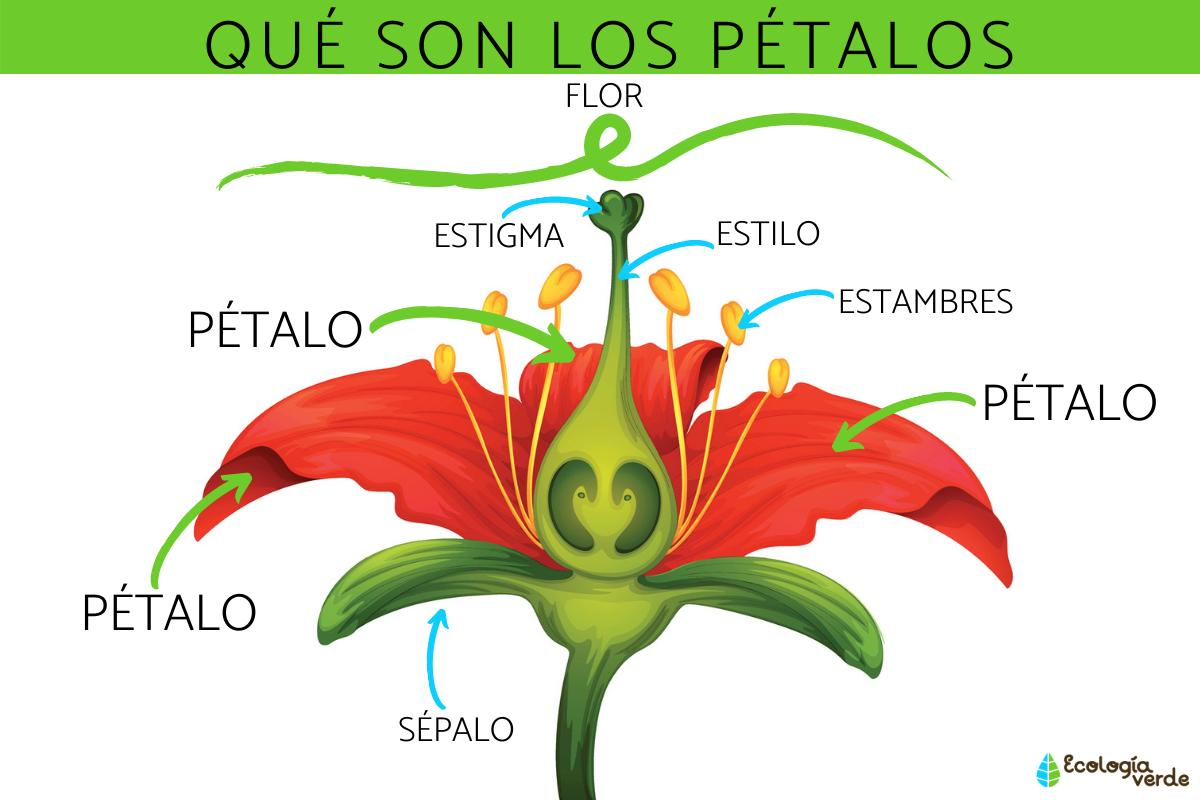

El sépalo y el pétalo son dos de las partes que componen la flor de una planta.

El **sépalo** es la parte más externa de la flor, que rodea y protege los pétalos, los estambres y los pistilos en desarrollo. El sépalo suele estar compuesto por varias hojas de aspecto similar y puede ser de diferentes colores y formas, dependiendo de la especie de la planta.

Los **pétalos** son las estructuras coloridas y a menudo llamativas que se encuentran en el centro de la flor, rodeando los órganos reproductivos de la planta. Los pétalos pueden tener diferentes formas y tamaños, y su colorido y patrón a menudo son importantes para atraer a los polinizadores, como las abejas, las mariposas y los colibríes.

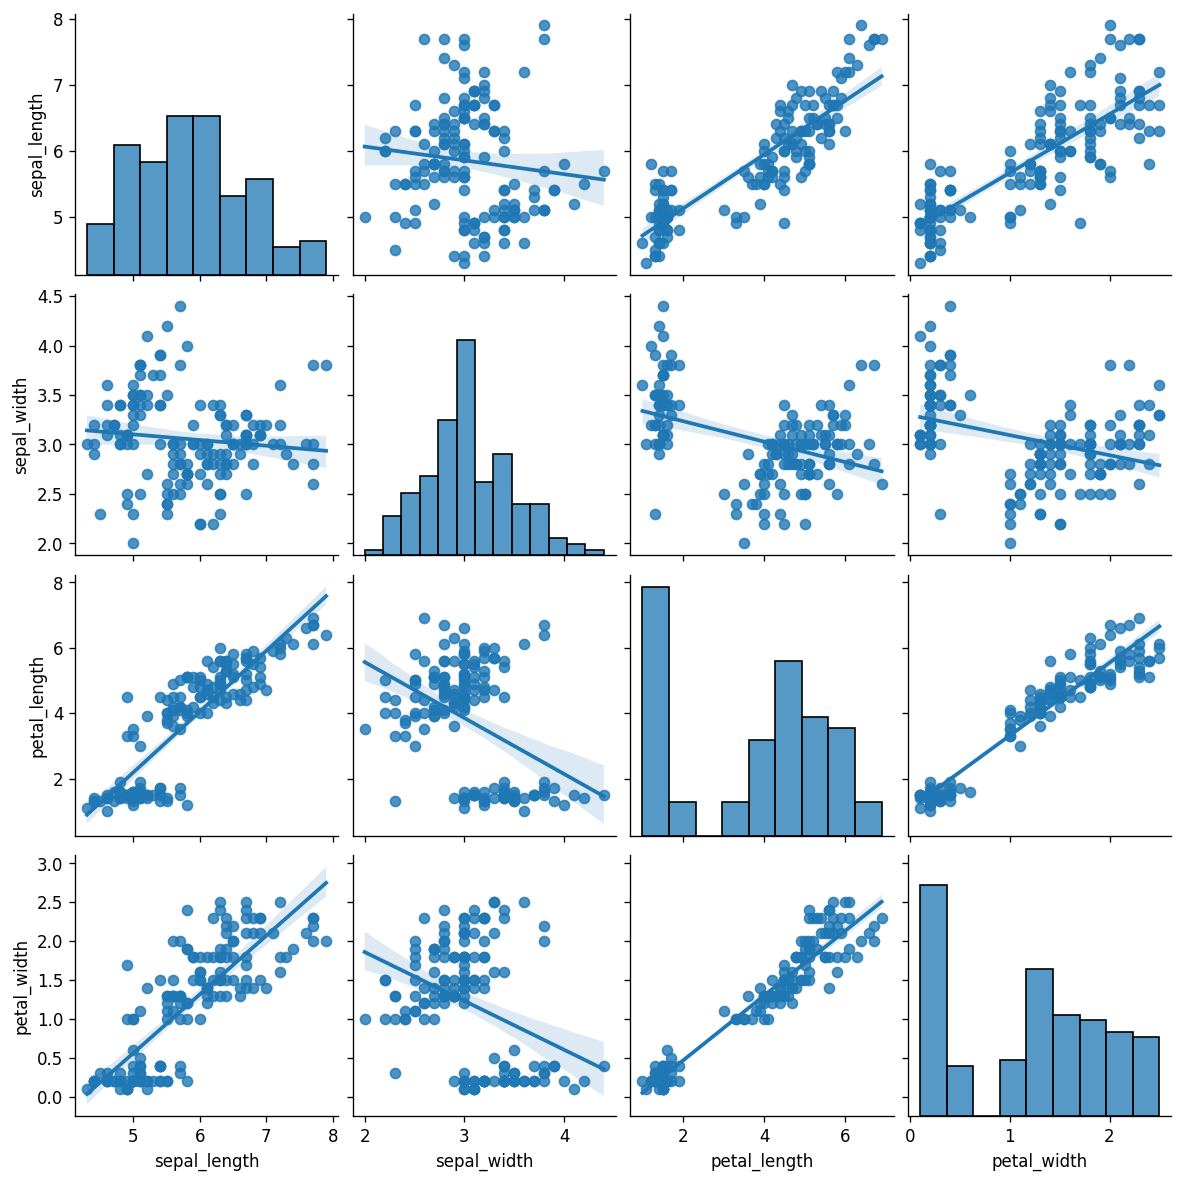

In [211]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
import seaborn as sns

sns.pairplot(iris, kind="reg")
plt.show()

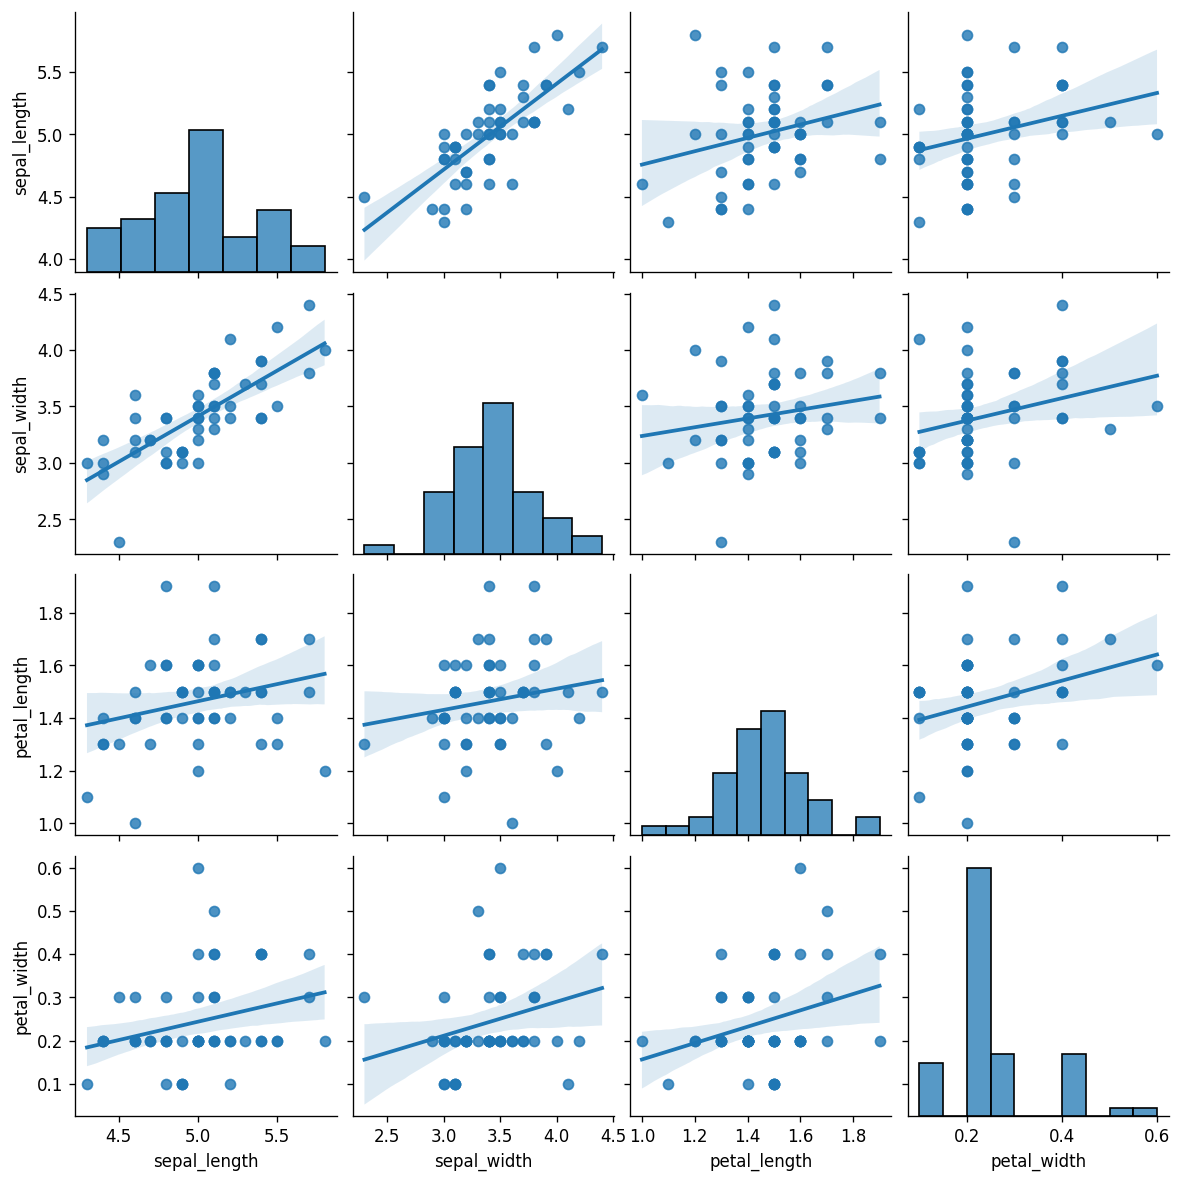

In [212]:
# Iris-setosa        50
# Iris-versicolor    50
# Iris-virginica     50
sns.pairplot(iris[iris["class"] == "Iris-setosa"], kind="reg")
plt.show()

Las características de las flores están representadas por la longitud y el ancho del sépalo y los pétalos, y la clase de la flor es la variable de destino.

Por tanto, el objetivo de la regresión logística es predecir el tipo de flor (clase, variable dependiente) en función de sus características físicas (variables independientes).

In [213]:
# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X = iris.iloc[:, :-1] # todos los datos excepto la última columna
y = iris.iloc[:, -1] # sólo la última columna

In [214]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# y = le.fit_transform(y)

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [216]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [217]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

In [218]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
60,5.0,2.0,3.5,1.0
116,6.5,3.0,5.5,1.8
144,6.7,3.3,5.7,2.5
119,6.0,2.2,5.0,1.5
108,6.7,2.5,5.8,1.8
...,...,...,...,...
9,4.9,3.1,1.5,0.1
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
117,7.7,3.8,6.7,2.2


In [219]:
X_test

,sepal_length,sepal_width,petal_length,petal_width
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2
100,6.3,3.3,6.0,2.5
40,5.0,3.5,1.3,0.3
86,6.7,3.1,4.7,1.5
76,6.8,2.8,4.8,1.4
71,6.1,2.8,4.0,1.3


In [220]:
y_train

60     Iris-versicolor
116     Iris-virginica
144     Iris-virginica
119     Iris-virginica
108     Iris-virginica
            ...       
9          Iris-setosa
103     Iris-virginica
67     Iris-versicolor
117     Iris-virginica
47         Iris-setosa
Name: class, Length: 105, dtype: object

In [221]:
y_test

114     Iris-virginica
62     Iris-versicolor
33         Iris-setosa
107     Iris-virginica
7          Iris-setosa
100     Iris-virginica
40         Iris-setosa
86     Iris-versicolor
76     Iris-versicolor
71     Iris-versicolor
134     Iris-virginica
51     Iris-versicolor
73     Iris-versicolor
54     Iris-versicolor
63     Iris-versicolor
37         Iris-setosa
78     Iris-versicolor
90     Iris-versicolor
45         Iris-setosa
16         Iris-setosa
121     Iris-virginica
66     Iris-versicolor
24         Iris-setosa
8          Iris-setosa
126     Iris-virginica
22         Iris-setosa
44         Iris-setosa
97     Iris-versicolor
93     Iris-versicolor
26         Iris-setosa
137     Iris-virginica
84     Iris-versicolor
27         Iris-setosa
127     Iris-virginica
132     Iris-virginica
59     Iris-versicolor
18         Iris-setosa
83     Iris-versicolor
61     Iris-versicolor
92     Iris-versicolor
112     Iris-virginica
2          Iris-setosa
141     Iris-virginica
43         

## Crear el modelo de random forest

#### y ajustarlo a los datos de entrenamiento

In [222]:
from sklearn.ensemble import RandomForestClassifier

# El modelo se ajusta y mejora mediante la optimización de los hiperparámetros
clf = RandomForestClassifier(n_estimators=100, random_state=1)
clf.fit(X_train, y_train) # es supervisado porque le decimos al modelo las respuestas correctas

RandomForestClassifier(random_state=1)

El valor predeterminado para n_estimators es 100, lo que significa que si no se especifica ningún valor, el modelo construirá 100 árboles de decisión en el bosque. Sin embargo, se puede ajustar este valor para obtener mejores resultados.

In [223]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9777777777777777


In [224]:
# Sacamos por pantalla los datos de test, junto con la predicción, los resultados esperados y booleano de acierto
df = X_test
df["prediccion"] = y_pred
df["real"] = y[X_test.index]
df["acierto"] = (df["prediccion"] == df["real"])

df

,sepal_length,sepal_width,petal_length,petal_width,prediccion,real,acierto
114,5.8,2.8,5.1,2.4,Iris-virginica,Iris-virginica,True
62,6.0,2.2,4.0,1.0,Iris-versicolor,Iris-versicolor,True
33,5.5,4.2,1.4,0.2,Iris-setosa,Iris-setosa,True
107,7.3,2.9,6.3,1.8,Iris-virginica,Iris-virginica,True
7,5.0,3.4,1.5,0.2,Iris-setosa,Iris-setosa,True
100,6.3,3.3,6.0,2.5,Iris-virginica,Iris-virginica,True
40,5.0,3.5,1.3,0.3,Iris-setosa,Iris-setosa,True
86,6.7,3.1,4.7,1.5,Iris-versicolor,Iris-versicolor,True
76,6.8,2.8,4.8,1.4,Iris-versicolor,Iris-versicolor,True
71,6.1,2.8,4.0,1.3,Iris-versicolor,Iris-versicolor,True


***

## Cross Validation

Con validación cruzada (cross validation) ajustamos el hiperparámetro n_estimators del modelo de Random Forest y determinas el número óptimo de árboles en el bosque.

In [232]:
# Lista de valores para el hiperparámetro n_estimators que queremos ajustar
n_estimators_list = [10, 20, 25, 28, 30, 31, 32, 35, 40, 45, 48, 50, 52, 55, 58, 60, 65, 70, 75, 78, 80, 90, 100, 125, 150, 200]

In [233]:
# Utilizar la función GridSearchCV de Scikit-learn para ajustar el hiperparámetro n_estimators utilizando la validación cruzada
# La función GridSearchCV prueba todos los valores en la lista n_estimators_list y devuelve el mejor valor de n_estimators
# basado en la métrica de evaluación elegida

from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': n_estimators_list}
grid_search = GridSearchCV(RandomForestClassifier(random_state=1), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_n_estimators = grid_search.best_params_['n_estimators']

# cv=5 significa que la función GridSearchCV realizará una validación cruzada de 5 veces
# Durante cada iteración de validación cruzada, los datos se dividen en 5 pliegues (folds) diferentes
# Se ajusta el modelo en 4 pliegues y se evalúa en el restante
# Este proceso se repite 5 veces, utilizando cada pliegue como el conjunto de validación en una de las iteraciones
# Finalmente, se toma el promedio de las métricas de evaluación en cada iteración para obtener
# una medida general del rendimiento del modelo.

best_n_estimators

28

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [240]:
from sklearn.ensemble import RandomForestClassifier

# El modelo se ajusta y mejora mediante la optimización de los hiperparámetros
clf = RandomForestClassifier(n_estimators=28, random_state=1)
clf.fit(X_train, y_train) # es supervisado porque le decimos al modelo las respuestas correctas

RandomForestClassifier(n_estimators=28, random_state=1)

In [241]:
y_pred = clf.predict(X_test)

In [242]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9777777777777777


In [243]:
# Sacamos por pantalla los datos de test, junto con la predicción, los resultados esperados y booleano de acierto
df = X_test
df["prediccion"] = y_pred
df["real"] = y[X_test.index]
df["acierto"] = (df["prediccion"] == df["real"])

df

,sepal_length,sepal_width,petal_length,petal_width,prediccion,real,acierto
114,5.8,2.8,5.1,2.4,Iris-virginica,Iris-virginica,True
62,6.0,2.2,4.0,1.0,Iris-versicolor,Iris-versicolor,True
33,5.5,4.2,1.4,0.2,Iris-setosa,Iris-setosa,True
107,7.3,2.9,6.3,1.8,Iris-virginica,Iris-virginica,True
7,5.0,3.4,1.5,0.2,Iris-setosa,Iris-setosa,True
100,6.3,3.3,6.0,2.5,Iris-virginica,Iris-virginica,True
40,5.0,3.5,1.3,0.3,Iris-setosa,Iris-setosa,True
86,6.7,3.1,4.7,1.5,Iris-versicolor,Iris-versicolor,True
76,6.8,2.8,4.8,1.4,Iris-versicolor,Iris-versicolor,True
71,6.1,2.8,4.0,1.3,Iris-versicolor,Iris-versicolor,True


***

# Cosine similarity

In [249]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(X)
cosine_sim

array([[1.        , 0.99857916, 0.99998735, ..., 0.89178641, 0.8839093 ,
        0.88670276],
       [0.99857916, 1.        , 0.99879145, ..., 0.90415045, 0.89380008,
        0.89787445],
       [0.99998735, 0.99879145, 1.        , ..., 0.89362867, 0.88566903,
        0.88845942],
       ...,
       [0.89178641, 0.90415045, 0.89362867, ..., 1.        , 0.99780473,
        0.99912584],
       [0.8839093 , 0.89380008, 0.88566903, ..., 0.99780473, 1.        ,
        0.99886925],
       [0.88670276, 0.89787445, 0.88845942, ..., 0.99912584, 0.99886925,
        1.        ]])

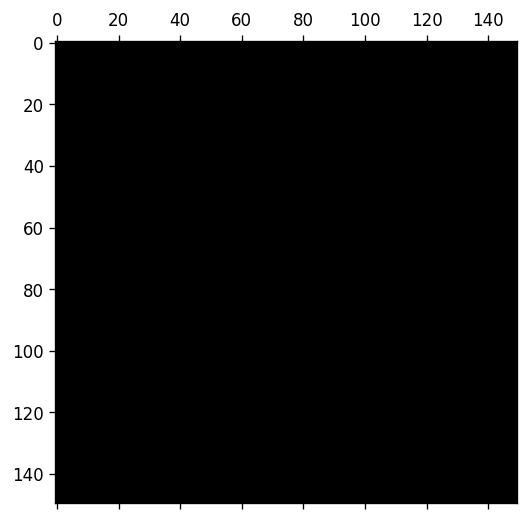

In [251]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (10, 5), 'figure.dpi': 120})

plt.spy(cosine_sim)
plt.show()

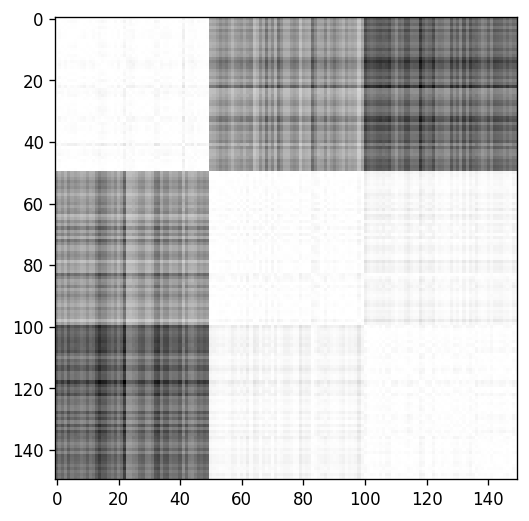

In [252]:
plt.imshow(cosine_sim, cmap='gray', interpolation='nearest')
plt.show()

In [253]:
cosine_sim[83]

array([0.88329249, 0.89636861, 0.88513399, 0.90149853, 0.8804437 ,
       0.89490882, 0.88825369, 0.8923651 , 0.90136122, 0.89764475,
       0.88422204, 0.89859527, 0.89407787, 0.8733775 , 0.85861458,
       0.87071461, 0.87105412, 0.88571734, 0.89517597, 0.8834718 ,
       0.90293653, 0.8885768 , 0.85028884, 0.9131206 , 0.91535893,
       0.90827076, 0.90308972, 0.8894655 , 0.88569572, 0.90458004,
       0.90702157, 0.89578963, 0.87000781, 0.86512607, 0.89764475,
       0.87758454, 0.87624363, 0.89764475, 0.89139426, 0.89219775,
       0.87916439, 0.90998989, 0.8849568 , 0.90401072, 0.90809682,
       0.89949354, 0.88709261, 0.89199947, 0.88422999, 0.8886509 ,
       0.99335352, 0.99472086, 0.9962249 , 0.99745413, 0.9964861 ,
       0.99845479, 0.99611435, 0.99260524, 0.99515765, 0.99648029,
       0.9954505 , 0.99501765, 0.99177894, 0.99835312, 0.98936659,
       0.99236659, 0.99762652, 0.99431031, 0.99617726, 0.99501723,
       0.99728318, 0.99247397, 0.9987533 , 0.99785122, 0.99355

In [257]:
dfSimilar83 = pd.DataFrame({"sim": cosine_sim[83]})
dfSimilar83

,sim
0,0.883292
1,0.896369
2,0.885134
3,0.901499
4,0.880444
...,...
145,0.997291
146,0.998598
147,0.998981
148,0.996135


In [259]:
dfSimilar83.sort_values("sim", ascending=False)

,sim
83,1.000000
116,0.999940
125,0.999907
103,0.999744
137,0.999730
...,...
15,0.870715
32,0.870008
33,0.865126
14,0.858615


In [260]:
dfSimilar83["class"] = y[dfSimilar83.index]
dfSimilar83

,sim,class
0,0.883292,Iris-setosa
1,0.896369,Iris-setosa
2,0.885134,Iris-setosa
3,0.901499,Iris-setosa
4,0.880444,Iris-setosa
...,...,...
145,0.997291,Iris-virginica
146,0.998598,Iris-virginica
147,0.998981,Iris-virginica
148,0.996135,Iris-virginica


In [286]:
dfSimilar83theMost = dfSimilar83.sort_values("sim", ascending=False)[:20]
dfSimilar83theMost

,sim,class
83,1.000000,Iris-versicolor
116,0.999940,Iris-virginica
125,0.999907,Iris-virginica
103,0.999744,Iris-virginica
137,0.999730,Iris-virginica
133,0.999609,Iris-virginica
117,0.999571,Iris-virginica
102,0.999553,Iris-virginica
111,0.999510,Iris-virginica
131,0.999371,Iris-virginica


In [287]:
X.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [288]:
dfSimilar83theMost['sepal_length'] = X.iloc[dfSimilar83theMost.index, 0]
dfSimilar83theMost['sepal_width'] = X.iloc[dfSimilar83theMost.index, 1]
dfSimilar83theMost['petal_length'] = X.iloc[dfSimilar83theMost.index, 2]
dfSimilar83theMost['petal_width'] = X.iloc[dfSimilar83theMost.index, 3]

dfSimilar83theMost

,sim,class,sepal_length,sepal_width,petal_length,petal_width
83,1.000000,Iris-versicolor,6.0,2.7,5.1,1.6
116,0.999940,Iris-virginica,6.5,3.0,5.5,1.8
125,0.999907,Iris-virginica,7.2,3.2,6.0,1.8
103,0.999744,Iris-virginica,6.3,2.9,5.6,1.8
137,0.999730,Iris-virginica,6.4,3.1,5.5,1.8
133,0.999609,Iris-virginica,6.3,2.8,5.1,1.5
117,0.999571,Iris-virginica,7.7,3.8,6.7,2.2
102,0.999553,Iris-virginica,7.1,3.0,5.9,2.1
111,0.999510,Iris-virginica,6.4,2.7,5.3,1.9
131,0.999371,Iris-virginica,7.9,3.8,6.4,2.0


In [289]:
dfSimilar83theMost.iloc[0]['sepal_length']

6.0

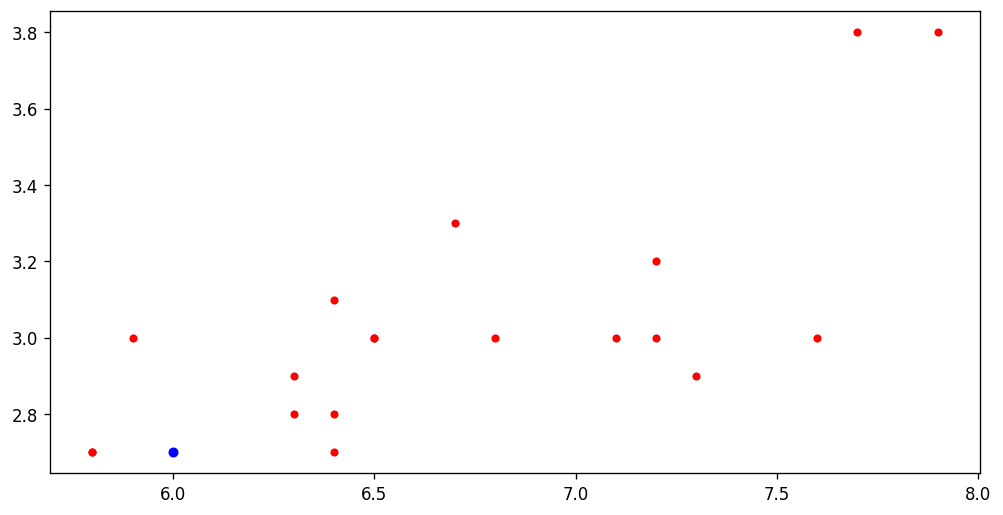

In [290]:
# Dibujamos todas las flores similares a 83 en el plano de longitud y anchura de sépalo
plt.scatter(dfSimilar83theMost['sepal_length'], dfSimilar83theMost['sepal_width'], s=15, color="red")
plt.scatter(dfSimilar83theMost.iloc[0]['sepal_length'], dfSimilar83theMost.iloc[0]['sepal_width'], s=25, color="blue")
plt.show()

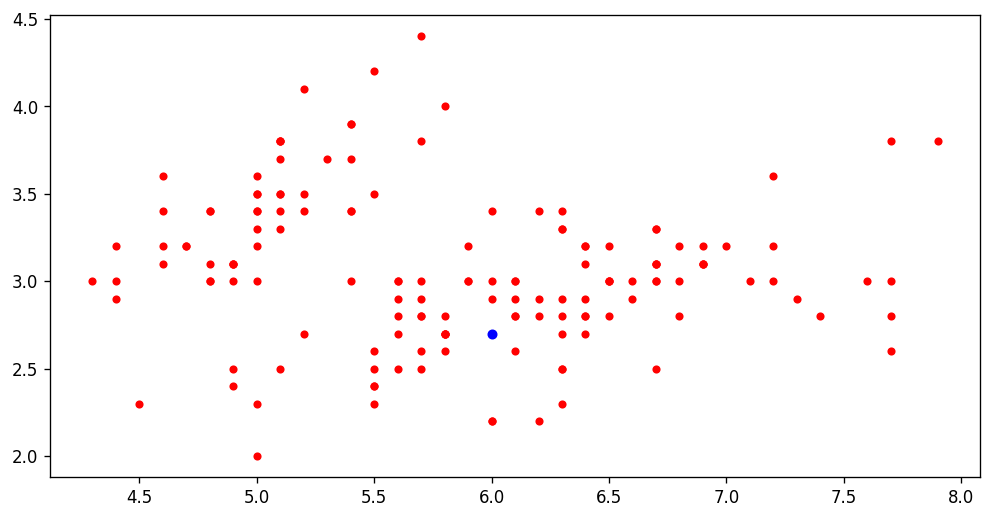

In [291]:
# Dibujamos todas las flores en el plano de longitud y anchura de sépalo
plt.scatter(iris['sepal_length'], iris['sepal_width'], s=15, color="red")
plt.scatter(iris.iloc[83]['sepal_length'], iris.iloc[83]['sepal_width'], s=25, color="blue")
plt.show()

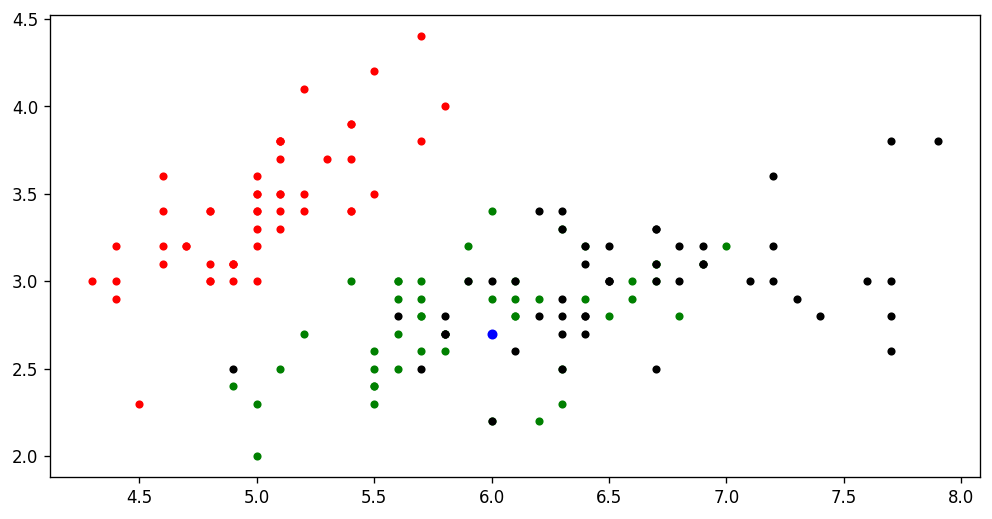

In [294]:
# Dibujamos todas las flores (las 3 categorías) en el plano de longitud y anchura de sépalo

# Iris-setosa        50
# Iris-versicolor    50
# Iris-virginica     50
plt.scatter(iris[iris["class"] == 'Iris-setosa']['sepal_length'], iris[iris["class"] == 'Iris-setosa']['sepal_width'], s=15, color="red")
plt.scatter(iris[iris["class"] == 'Iris-versicolor']['sepal_length'], iris[iris["class"] == 'Iris-versicolor']['sepal_width'], s=15, color="green")
plt.scatter(iris[iris["class"] == 'Iris-virginica']['sepal_length'], iris[iris["class"] == 'Iris-virginica']['sepal_width'], s=15, color="black")
plt.scatter(iris.iloc[83]['sepal_length'], iris.iloc[83]['sepal_width'], s=25, color="blue")
plt.show()

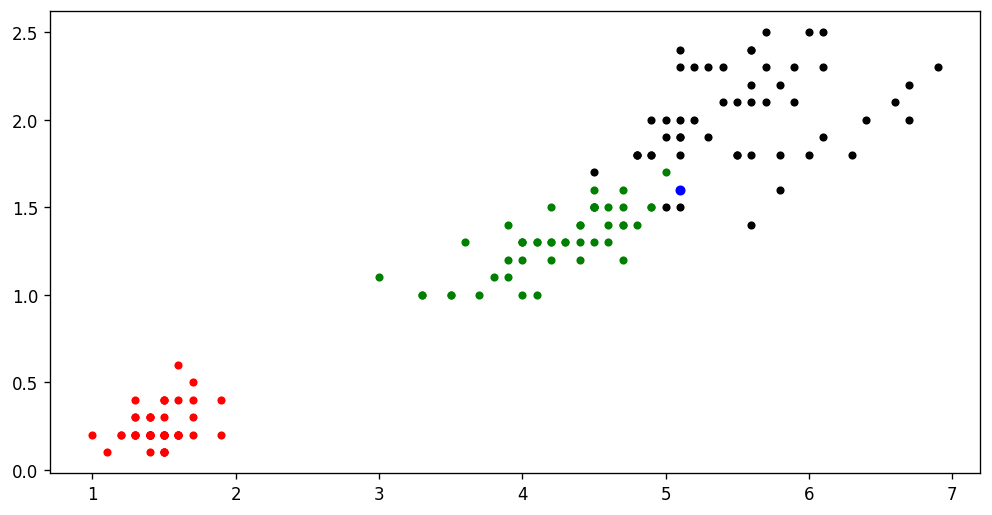

In [295]:
# Dibujamos todas las flores (las 3 categorías) en el plano de longitud y anchura de pétalo
plt.scatter(iris[iris["class"] == 'Iris-setosa']['petal_length'], iris[iris["class"] == 'Iris-setosa']['petal_width'], s=15, color="red")
plt.scatter(iris[iris["class"] == 'Iris-versicolor']['petal_length'], iris[iris["class"] == 'Iris-versicolor']['petal_width'], s=15, color="green")
plt.scatter(iris[iris["class"] == 'Iris-virginica']['petal_length'], iris[iris["class"] == 'Iris-virginica']['petal_width'], s=15, color="black")
plt.scatter(iris.iloc[83]['petal_length'], iris.iloc[83]['petal_width'], s=25, color="blue")
plt.show()

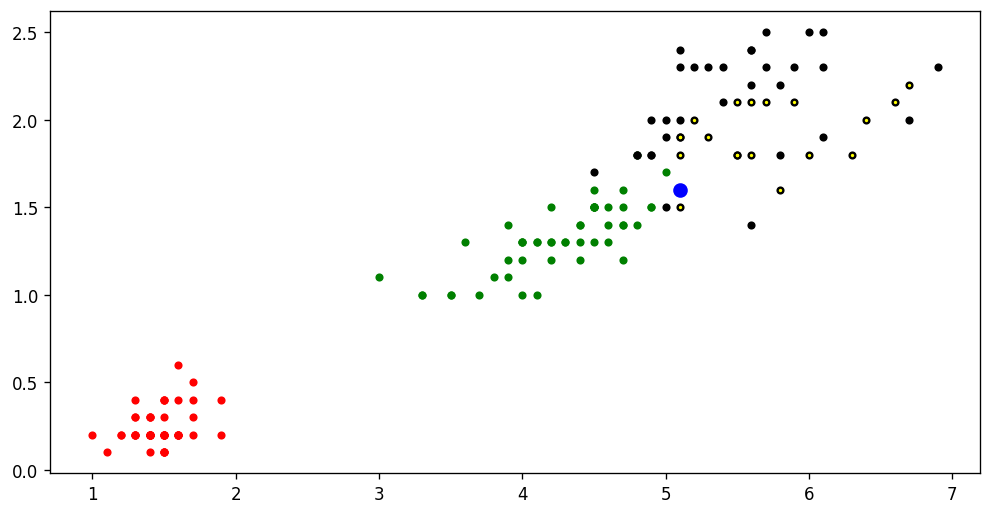

In [302]:
# Dibujamos todas las flores (las 3 categorías) en el plano de longitud y anchura de pétalo
# En amarillo las 10 flores más similares a la anomalía en 83
plt.scatter(iris[iris["class"] == 'Iris-setosa']['petal_length'], iris[iris["class"] == 'Iris-setosa']['petal_width'], s=15, color="red")
plt.scatter(iris[iris["class"] == 'Iris-versicolor']['petal_length'], iris[iris["class"] == 'Iris-versicolor']['petal_width'], s=15, color="green")
plt.scatter(iris[iris["class"] == 'Iris-virginica']['petal_length'], iris[iris["class"] == 'Iris-virginica']['petal_width'], s=15, color="black")

plt.scatter(dfSimilar83theMost['petal_length'], dfSimilar83theMost['petal_width'], s=1, color="yellow")

plt.scatter(iris.iloc[83]['petal_length'], iris.iloc[83]['petal_width'], s=60, color="blue")

plt.show()

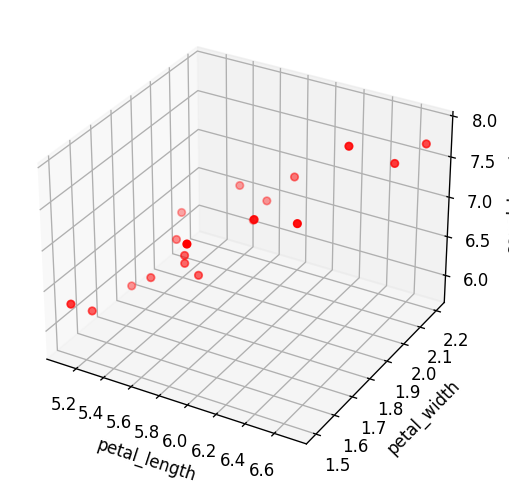

In [305]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = dfSimilar83theMost['petal_length']
y = dfSimilar83theMost['petal_width']
z = dfSimilar83theMost['sepal_length']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('petal_length')
ax.set_ylabel('petal_width')
ax.set_zlabel('sepal_length')

plt.ion()  # activar modo interactivo
plt.show()

In [319]:
import plotly.express as px
fig = px.scatter_3d(iris, x='sepal_length', y='sepal_width', z='petal_width', color='class')
fig.update_layout(height=800)  # ajusta la altura del gráfico 3d
fig.show()

In [321]:
import plotly.express as px
fig = px.scatter_3d(iris, x='sepal_length', y='sepal_width', z='petal_length', color='class')
fig.update_layout(height=800)  # ajusta la altura del gráfico 3d
fig.show()

***

# BoxPlot

In [325]:
iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


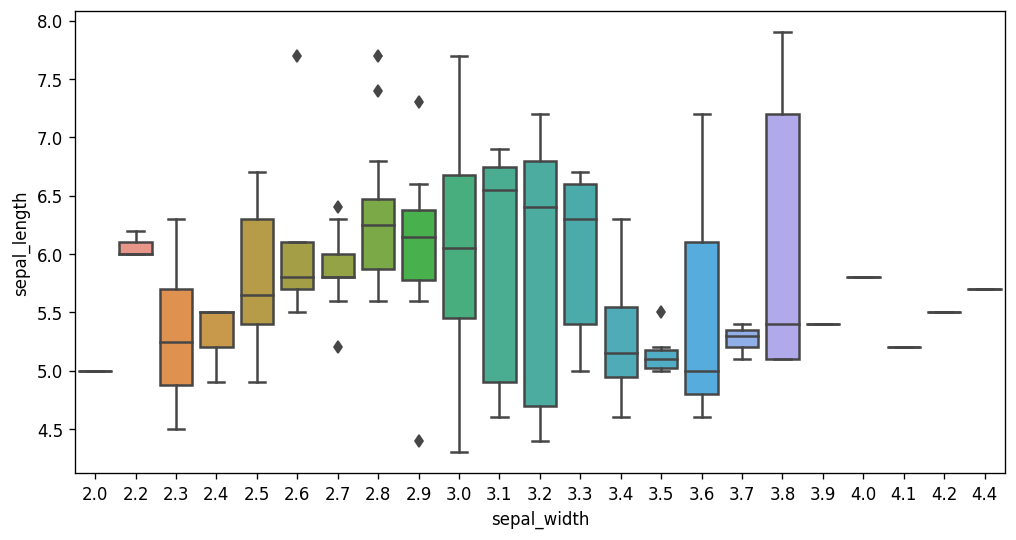

In [326]:
sns.boxplot(x='sepal_width', y='sepal_length', data=iris)
plt.show()

A boxplot plots the 25th percentile, the median (the 50th percentile), the 75th percentile, and outlying or extreme values. The boundaries of the box indicates the 25th percentile and the 75th percentile. The length of the box represents the difference between the 25th and 75th percentiles.

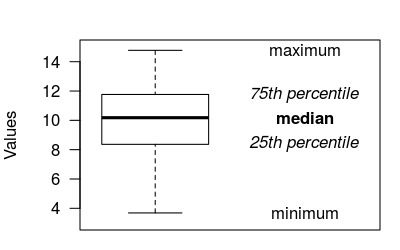

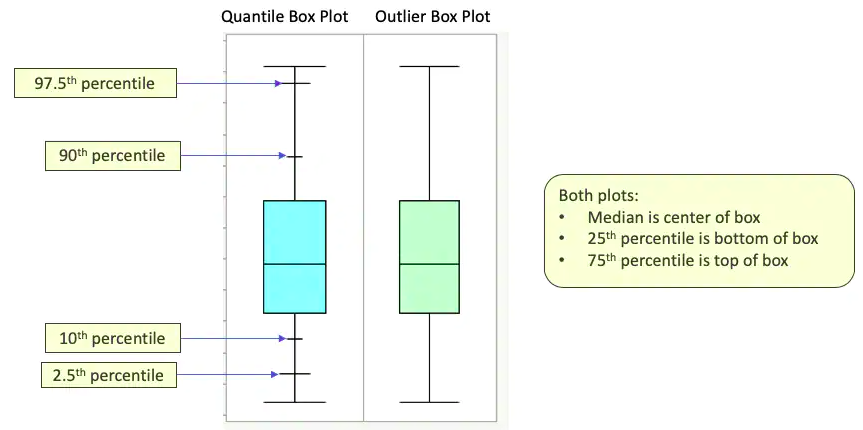

Los puntos representan outliers:

An outlier is a value that lies in both extremes of data. In other words, it's a value that lies outside the overall distribution pattern and thus can affect the overall data series.

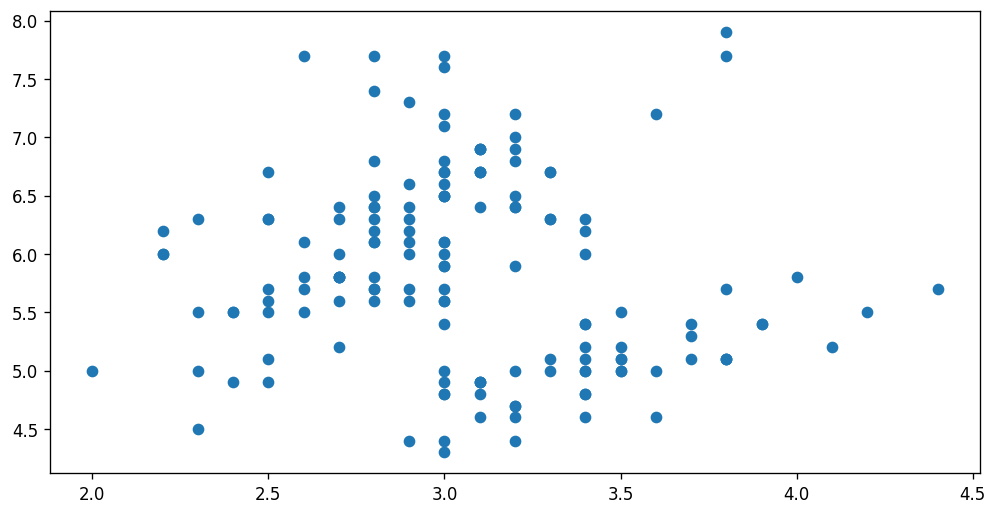

In [327]:
# En un gráfico de scatter los puntos pueden solaparse y no dejar ver cuál es su densidad
plt.scatter(iris['sepal_width'], iris['sepal_length'])
plt.show()

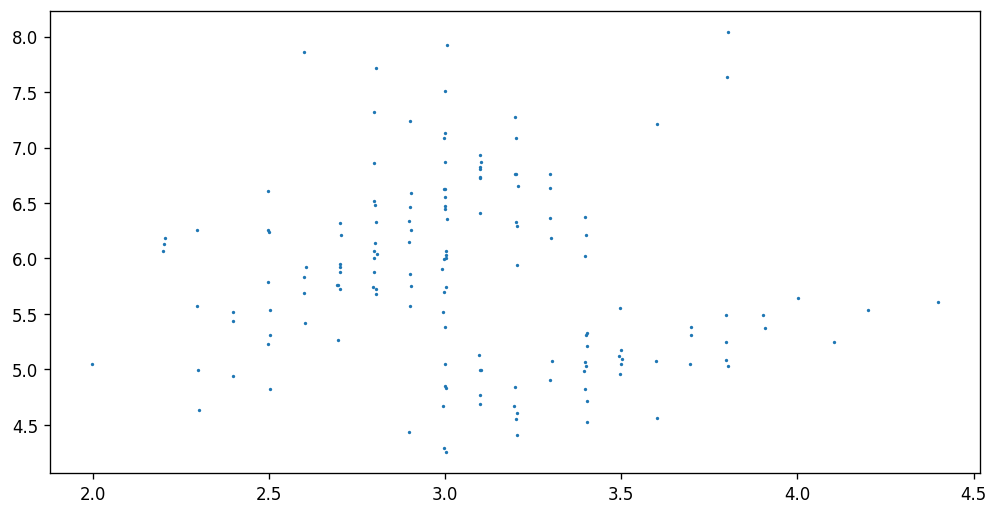

In [337]:
# Añadiendo ruido blanco podemos descubrir lo puntos solapados
plt.scatter(iris['sepal_width'] + np.random.normal(0, .003, iris.shape[0]), iris['sepal_length'] + np.random.normal(0, .09, iris.shape[0]), s=1)
plt.show()